Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

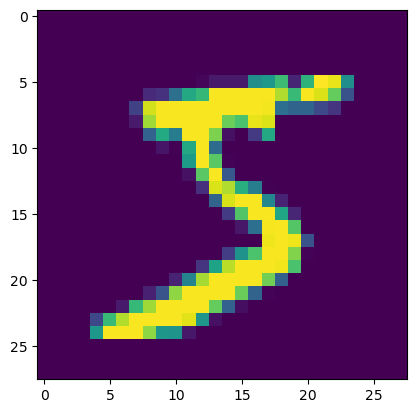

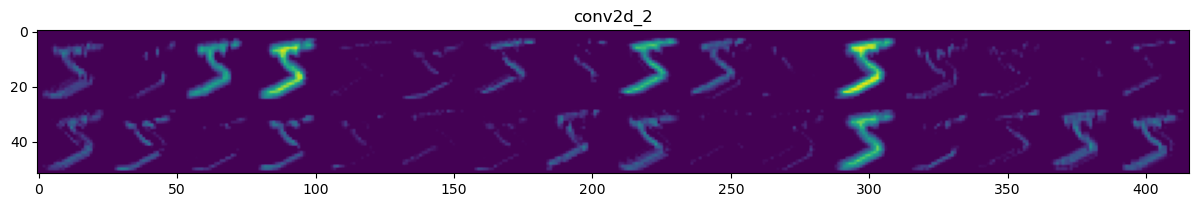

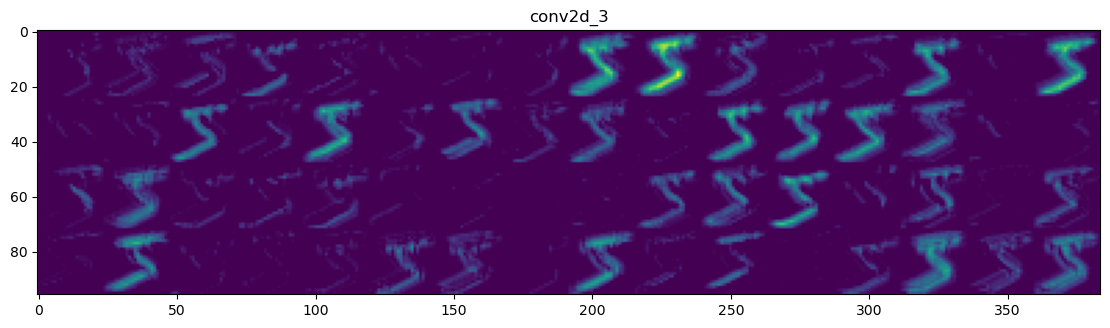

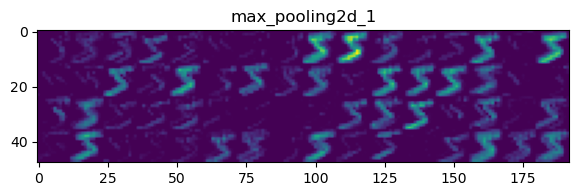

In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import load_model,Model,Sequential
from keras import backend as K
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=mnist.load_data()
image = x_train[0]
plt.imshow(image)

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

layer_outputs=[layer.output for layer in model.layers[:3]]
activation_model=Model(inputs=model.input,outputs=layer_outputs)
image=np.reshape(image,(1,28,28,1))
activations = activation_model.predict(image)
first_layer_activation=activations[0]


layer_names=[]
for layer in model.layers[:3]:
    layer_names.append(layer.name)
images_per_row=16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols,images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    plt.figure(figsize=(display_grid.shape[1]/28,display_grid.shape[0]/28))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

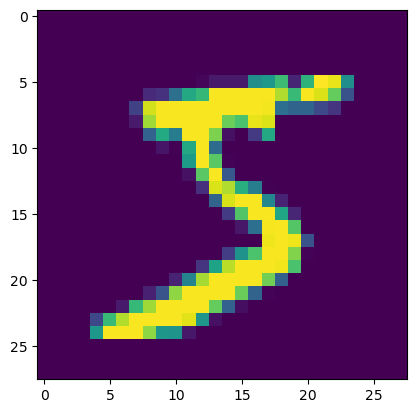

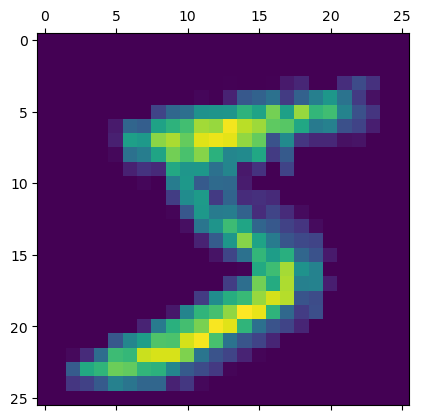

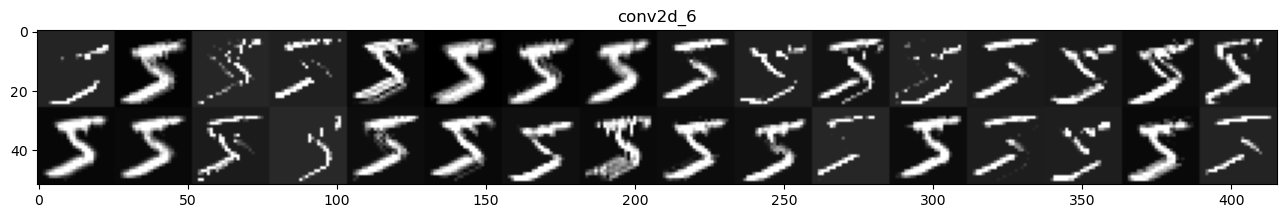

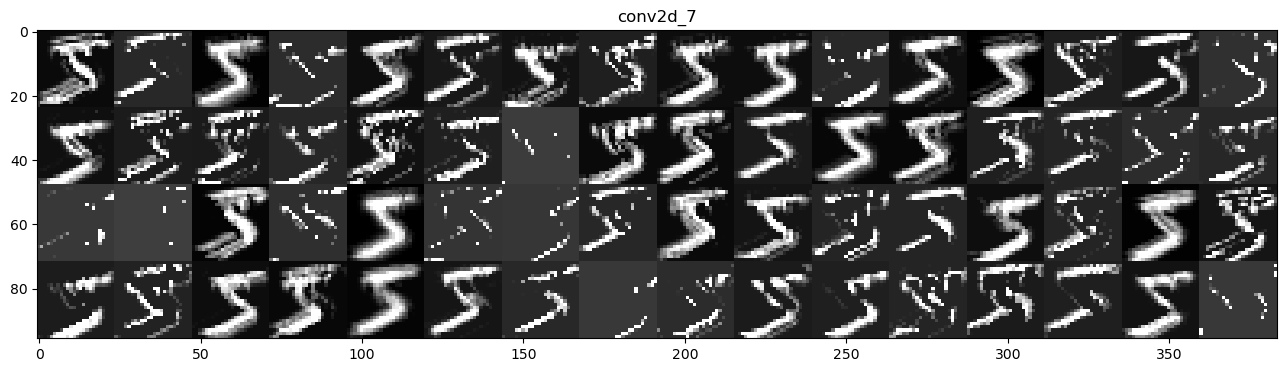

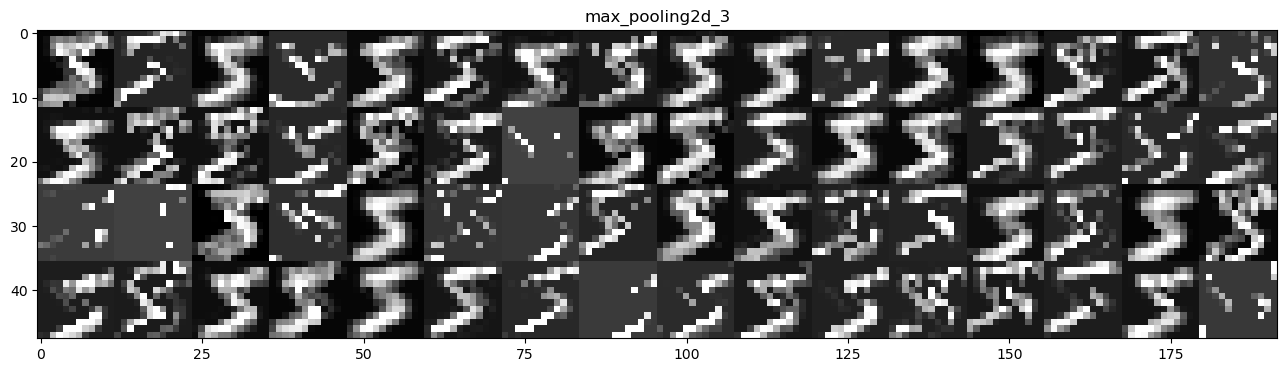

In [4]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import load_model,Model,Sequential
from keras import backend as K
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=mnist.load_data()
image = x_train[0]
plt.imshow(image)

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

layer_outputs=[layer.output for layer in model.layers[:3]]
activation_model=Model(inputs=model.input,outputs=layer_outputs)
image=np.reshape(image,(1,28,28,1))
activations = activation_model.predict(image)
first_layer_activation=activations[0]
plt.matshow(first_layer_activation[0,:,:,1],cmap='viridis')

layer_names=[]
for layer in model.layers[:3]:
    layer_names.append(layer.name)
images_per_row=16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    print(size)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols,images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image=layer_activation[0,:,:,col*images_per_row+row]
            channel_image-=channel_image.mean()
            channel_image/=channel_image.std()
            channel_image *= 64
            channel_image +=128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    plt.figure(figsize=(display_grid.shape[1]/size,display_grid.shape[0]/size))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='gray')